## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")

combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

group_data = combined_data.groupby("Drug Regimen")
grouped_tumor = group_data["Tumor Volume (mm3)"]

tumor_mean = grouped_tumor.mean()
tumor_median = grouped_tumor.median()
tumor_std = grouped_tumor.std()
tumor_sem = grouped_tumor.sem()

summary = pd.merge(pd.merge(tumor_mean, tumor_median, on = "Drug Regimen", how = "outer"),
                   pd.merge(tumor_std, tumor_sem, on = "Drug Regimen", how = "outer"), 
                   on = "Drug Regimen", how = "outer")

summary = summary.rename(columns = {"Tumor Volume (mm3)_x_x":"Tumor Volume_Mean",
                                    "Tumor Volume (mm3)_y_x":"Tumor Volume_Median",
                                    "Tumor Volume (mm3)_x_y":"Tumor Volume_StdError",
                                    "Tumor Volume (mm3)_y_y":"Tumor Volume_SEM"})

summary

,Tumor Volume_Mean,Tumor Volume_Median,Tumor Volume_StdError,Tumor Volume_SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.322552,50.854632,6.507770,0.512884
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar plots

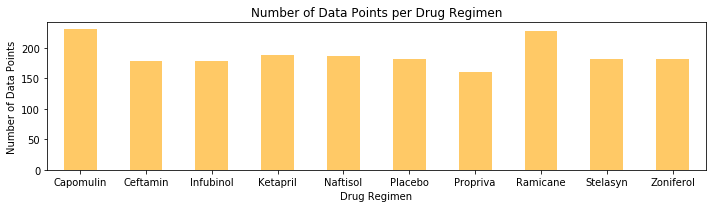

In [21]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
counts = group_data.count()["Mouse ID"]

counts.plot(kind = "bar", figsize = (10,3), color = "orange", alpha = 0.6, rot = 0, width = 0.5, title = "Number of Data Points per Drug Regimen")
plt.ylabel("Number of Data Points")

plt.tight_layout()
plt.show()

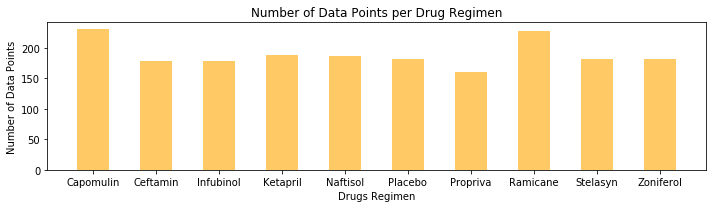

In [22]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(counts))
drugs = summary.index

plt.figure(figsize = (10,3))
plt.bar(x_axis, counts, color = "orange", alpha = 0.6, width = 0.5 )

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs)
plt.xlabel("Drugs Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points per Drug Regimen")

plt.tight_layout()
plt.show()

## Pie plots

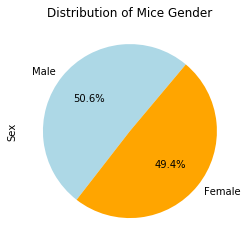

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_counts = combined_data["Sex"].value_counts()
color = ["lightblue", "orange"]
gender_counts.plot(kind = "pie", colors = color, startangle = 50, title = "Distribution of Mice Gender",autopct="%1.1f%%" )

plt.show()

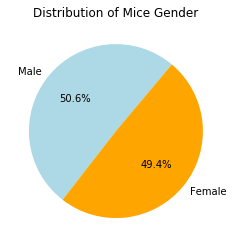

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
color = ["lightblue", "orange"]
plt.pie(gender_counts, colors = color, startangle = 50, labels = gender_counts.index, autopct="%1.1f%%")

plt.title("Distribution of Mice Gender")
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.                                     
max_tumor_data = combined_data.groupby("Mouse ID").max()
max_tumor_data = max_tumor_data.reset_index()
updated_data = pd.merge(max_tumor_data[["Mouse ID","Timepoint"]],combined_data, on = ["Mouse ID","Timepoint"])
updated_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [8]:
# Filter data for the four interested regimens.
capomulin_data = updated_data.loc[(updated_data["Drug Regimen"] == "Capomulin")]["Tumor Volume (mm3)"]
ramicane_data = updated_data.loc[(updated_data["Drug Regimen"] == "Ramicane")]["Tumor Volume (mm3)"]
infubinol_data = updated_data.loc[(updated_data["Drug Regimen"] == "Infubinol")]["Tumor Volume (mm3)"]
ceftamin_data = updated_data.loc[(updated_data["Drug Regimen"] == "Ceftamin")]["Tumor Volume (mm3)"]

In [9]:
# Obtain Capomulin outliers
c_quartiles = capomulin_data.quantile([0.25,0.5,0.75])
c_lowerq = c_quartiles[0.25]
c_upperq = c_quartiles[0.75]
c_iqr = c_upperq - c_lowerq

c_lower_bound = c_lowerq - (1.5*c_iqr)
c_upper_bound = c_upperq + (1.5*c_iqr)

c_outliers_data = capomulin_data.loc[(capomulin_data < c_lower_bound) | (capomulin_data > c_upper_bound)]

print(f"Potential outliers for Capomulin treatment is {c_outliers_data}")

Potential outliers for Capomulin treatment is Series([], Name: Tumor Volume (mm3), dtype: float64)


In [10]:
# Obtain Ramicane outliers
r_quartiles = ramicane_data.quantile([0.25,0.5,0.75])
r_lowerq = r_quartiles[0.25]
r_upperq = r_quartiles[0.75]
r_iqr = r_upperq - r_lowerq

r_lower_bound = r_lowerq - (1.5*r_iqr)
r_upper_bound = r_upperq + (1.5*r_iqr)

r_outliers_data = ramicane_data.loc[(ramicane_data < r_lower_bound) | (ramicane_data > r_upper_bound)]

print(f"Potential outliers for Ramicane treatment is {r_outliers_data}")

Potential outliers for Ramicane treatment is Series([], Name: Tumor Volume (mm3), dtype: float64)


In [11]:
# Obtain Infubinol outliers
i_quartiles = infubinol_data.quantile([0.25,0.5,0.75])
i_lowerq = i_quartiles[0.25]
i_upperq = i_quartiles[0.75]
i_iqr = i_upperq - i_lowerq

i_lower_bound = i_lowerq - (1.5*i_iqr)
i_upper_bound = i_upperq + (1.5*i_iqr)

i_outliers_data = infubinol_data.loc[(infubinol_data < i_lower_bound) | (infubinol_data > i_upper_bound)]

print(f"Potential outliers for Infubinol treatment is {i_outliers_data}")

Potential outliers for Infubinol treatment is 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [12]:
# Obtain Ceftamin outliers
c_quartiles = ceftamin_data.quantile([0.25,0.5,0.75])
c_lowerq = c_quartiles[0.25]
c_upperq = c_quartiles[0.75]
c_iqr = c_upperq - c_lowerq

c_lower_bound = c_lowerq - (1.5*c_iqr)
c_upper_bound = c_upperq + (1.5*c_iqr)

c_outliers_data = ceftamin_data.loc[(ceftamin_data < c_lower_bound) | (ceftamin_data > c_upper_bound)]

print(f"Potential outliers for Ceftamin treatment is {c_outliers_data}")

Potential outliers for Ceftamin treatment is Series([], Name: Tumor Volume (mm3), dtype: float64)


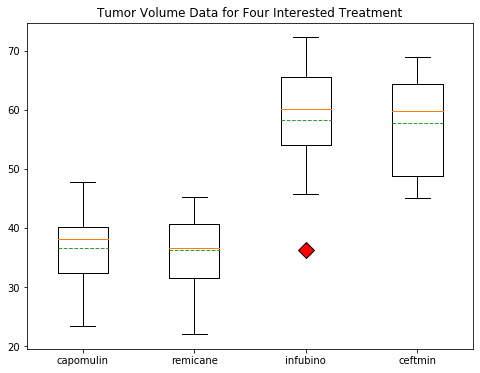

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Capomulin, Ramicane, Infubinol, and Ceftamin
data = [capomulin_data, ramicane_data, infubinol_data, ceftamin_data]
plt.figure(figsize = (8,6))
red_diamond = dict(markerfacecolor='r', marker='D', markersize = 11)
plt.boxplot(data, showmeans = True, meanline = True, flierprops = red_diamond, labels = ["capomulin","remicane","infubino","ceftmin"])
plt.title("Tumor Volume Data for Four Interested Treatment")

plt.show()

## Line and scatter plots

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Obtain full information for Capomulin and obtain mouse ID input
capomulin_complete_data = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
capomulin_complete_data.head()
mouse_id = input("Please enter the mouse ID you would like to search: ")

Please enter the mouse ID you would like to search: s185


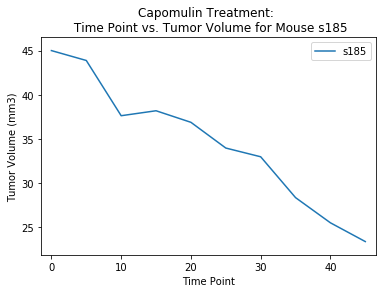

In [15]:
mouse_info = capomulin_complete_data.loc[capomulin_complete_data["Mouse ID"] == mouse_id]

x_axis = mouse_info["Timepoint"] 
y_axis = mouse_info["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, label = mouse_id)

plt.xlim(x_axis.min()-1.5, x_axis.max()+1.5)
plt.ylim(y_axis.min()-1.5, y_axis.max()+1.5)
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin Treatment: \n Time Point vs. Tumor Volume for Mouse {mouse_id}")
plt.legend(loc = "best")

plt.show()

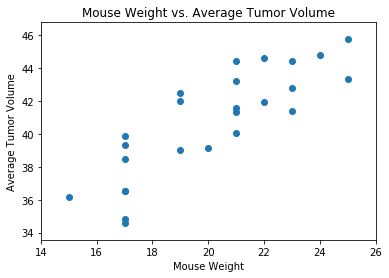

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_mouse = capomulin_complete_data.groupby("Mouse ID")
mouse_weight = capomulin_mouse["Weight (g)"].mean()
tumor_volume_mean = capomulin_mouse["Tumor Volume (mm3)"].mean() 

x_values = mouse_weight
y_values = tumor_volume_mean

plt.scatter(x_values,y_values)

plt.title("Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")

plt.xlim(x_values.min()-1, x_values.max()+1)
plt.ylim(y_values.min()-1, y_values.max()+1)

plt.show()

The correlation coefficient for mouse_weight and average tumor volume is 0.84


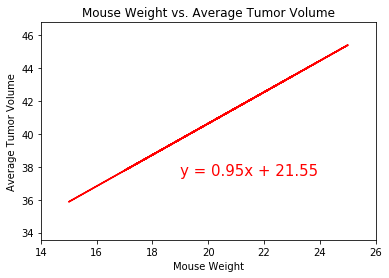

In [17]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(mouse_weight, tumor_volume_mean)
print(f"The correlation coefficient for mouse_weight and average tumor volume is {round(correlation[0],2)}" )

(slope, intercept, ravlue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = x_values*slope + intercept
line = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(x_values,regress_value,"r-")
plt.annotate(line,(19, 37.5),fontsize=15,color="red")

plt.xlim(x_values.min()-1, x_values.max()+1)
plt.ylim(y_values.min()-1, y_values.max()+1)

plt.title("Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()
